In [1]:
import sys
sys.path.insert(1, '../')

from Utils import *

[[1, 3], [-2, 2], [3, 0], [3, 1]]


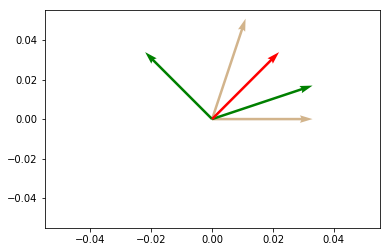

In [4]:
X_data, Y_data, x_test = load_data_custom()

In [19]:
qc1 = cos_classifier(X_data[0], x_test, Y_data[0] )
r1 = exec_simulator(qc1)
r1 = retrieve_proba(r1) 
print(r1)

qc2 = cos_classifier(X_data[1], x_test, Y_data[1])
r2 = exec_simulator(qc2)
r2 = retrieve_proba(r2)
print(r2)

qc3 = cos_classifier(X_data[2], x_test, Y_data[2])
r3 = exec_simulator(qc3)
r3 = retrieve_proba(r3)
print(r3)

qc4 = cos_classifier(X_data[3], x_test, Y_data[3])
r4 = exec_simulator(qc4)
r4 = retrieve_proba(r4)
print(r4)

out = [r1, r2, r3, r4]

p0 = [p[0] for p in out]
p1 = [p[1] for p in out]
print(np.mean(p0), np.mean(p1))
r_avg = [np.mean(p0), np.mean(p1)]

[0.889, 0.11099999999999999]
[0.522, 0.478]
[0.736, 0.264]
[0.105, 0.895]
0.5630000000000001 0.437


In [10]:
qc = ensemble_cos(X_data, Y_data, x_test)
r = exec_simulator(qc, n_shots=8192)
r_ens = retrieve_proba(r)
print(r_ens)

[0.56103515625, 0.43896484375]


In [11]:
print(qc)

                        ┌───┐               ░       ┌───┐       ░            »
q128_0: |0>─────────────┤ H ├───────────────░──■──■─┤ X ├─■──■──░────────────»
                        ├───┤               ░  │  │ └───┘ │  │  ░ ┌───┐      »
q128_1: |0>─────────────┤ H ├───────────────░──┼──┼───────┼──┼──░─┤ X ├─■──■─»
           ┌────────────┴───┴────────────┐  ░  │  │       │  │  ░ └───┘ │  │ »
   x_0: |0>┤ Initialize(0.31623,0.94868) ├──░──X──┼───────┼──┼──░───────┼──┼─»
           ├─────────────────────────────┴┐ ░  │  │       │  │  ░       │  │ »
   x_1: |0>┤ Initialize(-0.70711,0.70711) ├─░──┼──┼───────X──┼──░───────┼──┼─»
           └─────┬─────────────────┬──────┘ ░  │  │       │  │  ░       │  │ »
   x_2: |0>──────┤ Initialize(1,0) ├────────░──X──┼───────┼──┼──░───────X──┼─»
           ┌─────┴─────────────────┴─────┐  ░     │       │  │  ░       │  │ »
   x_3: |0>┤ Initialize(0.94868,0.31623) ├──░─────┼───────X──┼──░───────X──┼─»
           └─────┬─────────────────┬─────┘  ░     │ 

In [21]:
out = [r1, r2, r3, r4, r_avg, r_ens]
print(out)

[[0.889, 0.11099999999999999], [0.522, 0.478], [0.736, 0.264], [0.105, 0.895], [0.5630000000000001, 0.437], [0.56103515625, 0.43896484375]]


In [22]:
def plot_cls(predictions, 
             labels = ['$C_1$', '$C_2$', '$C_3$', '$C_4$', 'AVG', '$Ensemble$'],
             title = 'Test point classification' ):
    N = len(predictions)
    fig, ax = plt.subplots()
    ind = np.arange(N)    # the x locations for the groups
    width = 0.35         # the width of the bars
    prob_0 = [p[0] for p in predictions]
    prob_1 = [p[1] for p in predictions]
    #label = [l['label'] for l in dictionary]
    pl1 = ax.bar(ind, prob_0, width, bottom=0)
    pl2 = ax.bar(ind + width, prob_1, width, bottom=0)
    ax.set_title( title )
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels( labels )
    ax.legend((pl1[0], pl2[0]), ('P(y=0)', 'P(y=1)'))
    ax.autoscale_view()
    plt.show()
plot_cls(out, title= 'Comparisons_circuit')

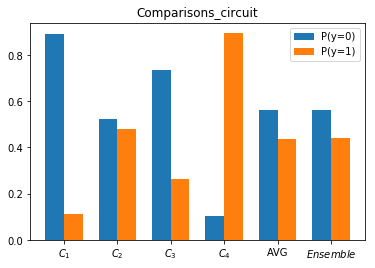

[[0.889, 0.11099999999999999], [0.522, 0.478], [0.736, 0.264], [0.105, 0.895], [0.5630000000000001, 0.437], [0.56103515625, 0.43896484375]]


In [ ]:
X, y = load_data()

test_size = .1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

Y_vector_train = label_to_array(y_train)
Y_vector_test = label_to_array(y_test)

print("Size Training Set: ", len(X_train))
print("Size Test Set: ", len(X_test))

accuracy = []
n_shots = 10
for i in range(10):
    #initialisation
    n = range(len(X_train))
    TP = 0
    predictions = []
    probabilities = []

    for x_test, y_ts in zip(X_test, Y_vector_test):
        ix = np.random.choice(n, 1)[0]
        x_train = X_train[ix]
        x_tr = normalize_custom(x_train)
        y_tr = Y_vector_train[ix]
        x_ts = normalize_custom(x_test)

        qc = cos_classifier(x_tr, x_ts, y_tr)
        r = exec_simulator(qc, n_shots=n_shots)

        if '0' not in r.keys():
            r['0'] = 0
        elif '1' not in r.keys():
            r['1'] = 0

        p0 = (r['0'] / (r['0'] + r['1']))
        p0 = p0
        p1 = 1 - p0

        predictions.append(r)
        probabilities.append(predict_cos(r))
        probs = [p0, p1]


        if predict_cos(r)[0] > predict_cos(r)[1]:
            pred = [1, 0]
            pred = np.asarray(pred)
        else:
            pred = [0, 1]
            pred = np.asarray(pred)

        # print('Data:', 'train=', x_train, 'test=', x_test)
        # print('results: ', 'tr:', y_tr, 'ts:', y_ts, 'pred:', pred, '\n')

        if np.array_equal(pred, y_ts):
            TP = TP + 1

    accuracy.append(TP / len(X_test))

print(np.mean(accuracy))
print(np.std(accuracy))

#

accuracy = []
n_shots = 1000


predictions = []
for x_test, y_ts in zip(X_test, Y_vector_test):
    ix_y1 = np.random.choice(np.where(y_train == 1)[0], 2, replace=False)
    ix_y0 = np.random.choice(np.where(y_train == 0)[0], 2, replace=False)

    X_data = np.concatenate([X_train[ix_y1], X_train[ix_y0]])

    for i in range(len(X_data)):
        X_data[i] = normalize_custom(X_data[i])

    x_test = normalize_custom(x_test)
    Y_data = np.concatenate([Y_vector_train[ix_y1], Y_vector_train[ix_y0]])

    qc = ensemble_cos(X_data, Y_data, x_test)
    r = exec_simulator(qc, n_shots=1000)

    predictions.append(retrieve_proba(r))
    print(retrieve_proba(r), y_ts)

evaluation_metrics(predictions, Y_vector_test)




In [1]:
import qiskit
qiskit.__version__


'0.8.2'